<a href="https://colab.research.google.com/github/akitim/SkillFactory_current/blob/main/MATH%26ML_8_%D0%90%D0%BB%D0%B3%D0%BE%D1%80%D0%B8%D1%82%D0%BC%D1%8B_%D0%BD%D0%B0_%D0%BE%D1%81%D0%BD%D0%BE%D0%B2%D0%B5_%D0%B4%D0%B5%D1%80%D0%B5%D0%B2%D1%8C%D0%B5%D0%B2_%D1%80%D0%B5%D1%88%D0%B5%D0%BD%D0%B8%D0%B9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###Задание 3.4

Дана часть датасета о домах в штате Айова, состоящая из 15 наблюдений:

Найдите уникальных кандидатов на пороговое значение  для фактора *Lot Frontage*.

In [2]:
import numpy as np
import pandas as pd

# path = '/content/AmesHousing.zip'
path = 'https://raw.githubusercontent.com/akitim/datasets/main/AmesHousing.zip'
ames_data = pd.read_csv(path)
ames_data = ames_data[(ames_data['Lot Frontage'] <=150) & (ames_data['Lot Area'] <=20000)]
ames_sample = ames_data[['Lot Frontage', 'Lot Area', 'SalePrice']].sample(
    n=15, #количество объектов
    random_state=42, #генератор случайных чисел
    ignore_index=True #сбрасываем счетчик индекса
)
ames_sample

,Lot Frontage,Lot Area,SalePrice
0,60.0,11040,108000
1,96.0,10628,193000
2,68.0,9717,142125
3,50.0,9060,150909
4,92.0,9215,204500
5,80.0,10386,305900
6,60.0,7350,139000
7,72.0,8640,229800
8,56.0,6956,97900
9,70.0,12886,175000


In [3]:
LF_sorted = ames_sample['Lot Frontage'].sort_values().drop_duplicates()
# LF_sorted
candidates = LF_sorted.rolling(2).mean().dropna()
candidates

8      53.0
0      58.0
14     61.0
2      65.0
9      69.0
7      71.0
5      76.0
4      86.0
1      94.0
12    101.0
Name: Lot Frontage, dtype: float64

Задание 3.5
1 point possible (graded)

Для части датасета о домах в Айове из предыдущего задания найдите уникальных кандидатов на пороговое значение  для фактора *Lot Area*.

In [4]:
ames_sample['Lot Area'].sort_values().drop_duplicates().\
    rolling(2).mean().dropna()

8      5508.0
6      7153.0
14     7425.0
13     7949.0
12     8405.5
7      8526.5
3      8850.0
4      9137.5
2      9466.0
5     10051.5
1     10507.0
0     10834.0
11    11365.0
9     12288.0
Name: Lot Area, dtype: float64

In [5]:
def find_candidates_for_thresholds(x, y):
    x_roll_mean = x.sort_values().drop_duplicates().rolling(2).mean().dropna()
    y_roll_mean = y[x_roll_mean.index].diff()
    return x_roll_mean[y_roll_mean != 0].values

def squared_error(y):
    y_pred = np.mean(y)
    return (y - y_pred) @ (y - y_pred) / len(y)

def entropy(y):
    p = np.unique(y, return_counts=True)[1] / y.size
    return - p @ np.log2(p)

def split(X, y, split_params):
    X_ = X.copy()
    # if type(X_) in [pd.DataFrame, pd.Series]:
    #     X_ = X_.values
    j, t = split_params
    predicat = X.iloc[:, j] <= t
    X_left, y_left, X_right, y_right = \
        X_[predicat], y[predicat], X_[~predicat], y[~predicat]
    return X_left, y_left, X_right, y_right

def calculate_weighted_impurity(X, y, split_params, crit):
    X_left, y_left, X_right, y_right = split(X, y, split_params)
    N, N_left, N_right = y.size, y_left.size, y_right.size
    return N_left / N * crit(y_left) + N_right / N * crit(y_right)

def best_split(X, y, crit):
    M = X.shape[1]
    min_wt_imp = np.inf
    opt_split_params = None
    for j in range(M):
        thrs = find_candidates_for_thresholds(X.iloc[:, j], y)
        for t in thrs:
            split_params = j, t
            wt_imp = calculate_weighted_impurity(X, y, split_params, crit)
            if wt_imp < min_wt_imp:
                min_wt_imp = wt_imp
                opt_split_params = split_params
    return opt_split_params


In [6]:
y_ = np.random.randint(0, 5, 100)
p = np.unique(y_, return_counts=True)[1] / y_.size
- p @ np.log2(p)


2.2970430915773137

In [7]:
X = ames_sample[['Lot Frontage', 'Lot Area']]
y = ames_sample['SalePrice']

best_split(X, y, squared_error)

(0, 71.0)

### Задание 4.5

Дана часть датасета о банкнотах, состоящая из 15 наблюдений:

Найдите оптимальные для построения решающего пня параметры разбиения $j$ и $t$. Для этого воспользуйтесь функцией `best_split()`, которую мы реализовали ранее. В качестве критерия информативности используется энтропию Шеннона.
1. На основе какого фактора $x_j$ будет построено решающее правило в корневой вершине?
2. Чему равно оптимальное пороговое значение ? Ответ **округлите до трёх знаков после точки-разделителя**.
3. Чему равно значение взвешенной неоднородности после разбиения при найденных оптимальных параметрах сплита? Ответ **округлите до двух знаков после точки-разделителя**.


In [8]:
path = 'https://raw.githubusercontent.com/akitim/datasets/main/bill_authentication.csv'

bill_data = pd.read_csv(path)
bill_sample = bill_data[['Variance', 'Skewness', 'Class']].sample(
    n=15,
    random_state=42,
    ignore_index=True
)
# Создаём обучающую выборку
X = bill_sample[['Variance', 'Skewness']]
y = bill_sample['Class']

In [9]:
j_opt, t_opt = best_split(X, y, crit=entropy)
print('Решающее правило в корневой вершине будет построено на основе фактора',
       X.columns[j_opt])
print('Оптимальное пороговое значение:', np.round(t_opt, 3))

wt_imp = calculate_weighted_impurity(X, y, (j_opt, t_opt), entropy)
print('Значение взвешенной неоднородности после разбиения\n',
      'при найденных оптимальных параметрах:', np.round(wt_imp, 2))

Решающее правило в корневой вершине будет построено на основе фактора Skewness
Оптимальное пороговое значение: 3.221
Значение взвешенной неоднородности после разбиения
 при найденных оптимальных параметрах: 0.46


[Text(0.5, 0.75, 'x[1] <= 3.221\nentropy = 0.722\nsamples = 15\nvalue = [12, 3]'),
 Text(0.25, 0.25, 'entropy = 0.985\nsamples = 7\nvalue = [4, 3]'),
 Text(0.75, 0.25, 'entropy = 0.0\nsamples = 8\nvalue = [8, 0]')]

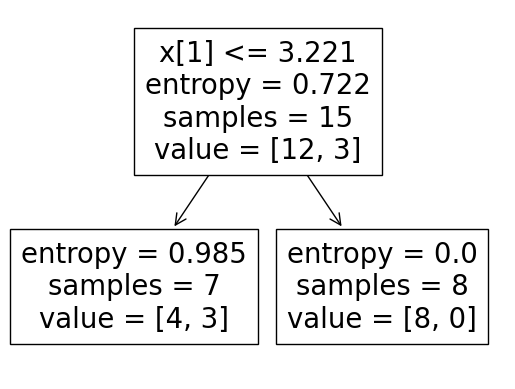

In [10]:
from sklearn.tree import DecisionTreeClassifier, plot_tree

dt = DecisionTreeClassifier(criterion='entropy', max_depth=1, random_state=0)
dt.fit(X, y)

plot_tree(dt)

In [23]:
class Node:
    def __init__(self, left=None,
                 right=None, value=None,
                 split_params=None, impurity=None,
                 samples=None, is_leaf=False,
                #  is_root=False
                 ):
        self.left = left
        self.right = right
        self.split_params = split_params
        self.value = value
        self.impurity = impurity
        self.samples = samples
        self.is_leaf = is_leaf
        # self.is_root = is_root

def create_leaf_prediction(y):
    return pd.Series(y_).mode()[0]

def stop_crit(X, y, crit):
    return crit(y) == 0

def build_decision_tree(X, y, crit):
    if stop_crit(X, y, crit):
        value = create_leaf_prediction(y)
        node = Node(
            value=value,
            impurity=crit(y),
            samples=y.size,
            is_leaf=True
        )
    else:
        split_params = best_split(X, y, crit=crit)
        X_left, y_left, X_right, y_right = split(X, y, split_params)
        left = build_decision_tree(X_left, y_left, crit)
        right = build_decision_tree(X_right, y_right, crit)
        node = Node(
            left=left, right=right,
            split_params=split_params,
            impurity=crit(y),
            samples=y.size
        )

    return node

def predict_sample(node, x):
    if node.is_leaf:
        return node.value
    j, t = node.split_params
    if x[j] <= t:
        return predict_sample(node.left, x)
    else:
        return predict_sample(node.right, x)

def predict(decision_tree, X):
    predictions = [predict_sample(decision_tree, x) for x in X.values]
    return np.array(predictions)

def print_decision_tree(node, depth=0):
    depth += 1
    if node.is_leaf:
        print('   ' * depth, 'class: {}'.format(node.value))
    else:
        print('   ' * depth, 'feature_{} <= {:.3f}:'.format(*node.split_params))
        print_decision_tree(node.left, depth=depth)
        print('   ' * depth, 'feature_{} > {:.3f}:'.format(*node.split_params))
        print_decision_tree(node.right, depth=depth)

def list_all_split_params(node):

    split_params_ls=[]
    def get_list(node=node, split_params_ls=split_params_ls):
        split_params_ls += [node.split_params]
        if node.is_leaf:
            return
        else:
            get_list(node.left, split_params_ls=split_params_ls)
            get_list(node.right, split_params_ls=split_params_ls)

### Задание 5.3

Дана часть датасета о банкнотах, состоящая из 15 наблюдений.

Постройте дерево решений на обучающей выборке с помощью функции `build_decision_tree()`. В качестве критерия информативности используйте энтропию Шеннона.
1. Сколько вершин дерева используют в качестве признака разбиения фактор $x_1(Variance)$?
2. Чему равна глубина полученного дерева?

In [12]:
path = 'https://raw.githubusercontent.com/akitim/datasets/main/bill_authentication.csv'

bill_data = pd.read_csv(path)
bill_sample = bill_data[['Variance', 'Skewness', 'Class']].sample(
    n=15,
    random_state=42,
    ignore_index=True
)
# Создаём обучающую выборку
X = bill_sample[['Variance', 'Skewness']]
y = bill_sample['Class']

In [24]:
decision_tree = build_decision_tree(X, y, crit=entropy)

ls = []
list_all_split_params(decision_tree, ls)
ls
# print_decision_tree(decision_tree)

# def levelTraversal(root, level):
#     if root is None:
#         return

#     if level >= len(listOfLists):
#         list = []
#         listOfLists.append(list)
#     listOfLists[level].append(root.v)
#     levelTraversal(root.l, level+1)
#     levelTraversal(root.r, level+1)

[(1, 3.22085),
 (0, 2.7561999999999998),
 (0, -1.2536399999999999),
 None,
 (0, -0.06343000000000001),
 None,
 (0, 0.988355),
 None,
 None,
 None,
 None]